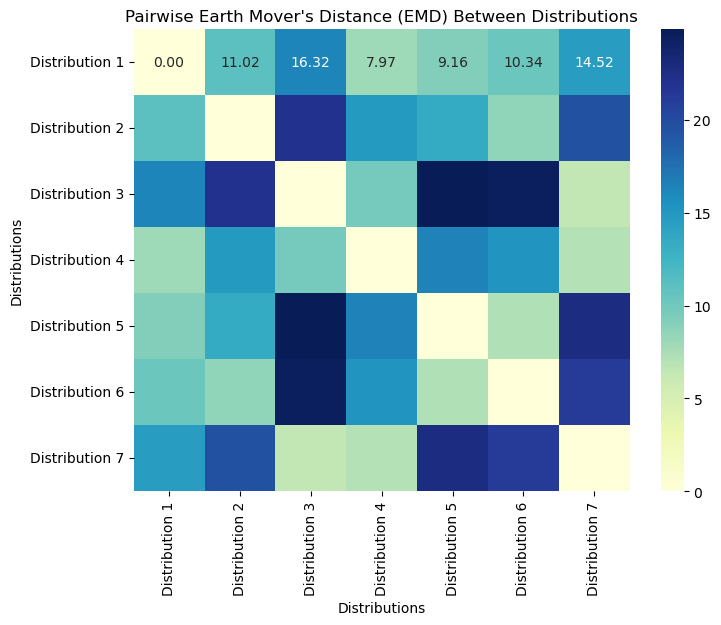

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

# File paths for your five distributions
file_paths = [
    '/Users/gianmarcoferrara/ComplexNetworksProject/degree_differences_1.csv',
    '/Users/gianmarcoferrara/ComplexNetworksProject/degree_differences_2.csv',
    '/Users/gianmarcoferrara/ComplexNetworksProject/degree_differences_3.csv',
    '/Users/gianmarcoferrara/ComplexNetworksProject/degree_differences_4.csv',
    '/Users/gianmarcoferrara/ComplexNetworksProject/degree_differences_5.csv',
    '/Users/gianmarcoferrara/ComplexNetworksProject/degree_differences_6.csv',
    '/Users/gianmarcoferrara/ComplexNetworksProject/degree_differences_7.csv'
]

# Load each distribution into a list
distributions = [pd.read_csv(file_path)['Degree_Difference'] for file_path in file_paths]

# Initialize an empty matrix to store EMD values
num_distributions = len(distributions)
emd_matrix = np.zeros((num_distributions, num_distributions))

# Compute pairwise EMD
for i in range(num_distributions):
    for j in range(num_distributions):
        emd_matrix[i, j] = wasserstein_distance(distributions[i], distributions[j])

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(emd_matrix, annot=True, fmt=".2f", cmap="YlGnBu",
            xticklabels=[f'Distribution {i+1}' for i in range(num_distributions)],
            yticklabels=[f'Distribution {i+1}' for i in range(num_distributions)])
plt.title("Pairwise Earth Mover's Distance (EMD) Between Distributions")
plt.xlabel("Distributions")
plt.ylabel("Distributions")
plt.show()
